<a href="https://colab.research.google.com/github/Yong-Hui-Liew/PyTorch-Adventure/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow



In [78]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [79]:
import torch
from torch import nn # nn contains all of PyTorch's building block for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.3.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Vides (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [80]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)  # Extra outer bracket required for model training later on
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [81]:
len(X), len(y)

(50, 50)

 ### Splitting data into training and test sets (one of most important concepts in ML in general)

 Let's create a training and test set with our data

In [82]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto come in!

"Visualize, visualize, visualize!"

In [83]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

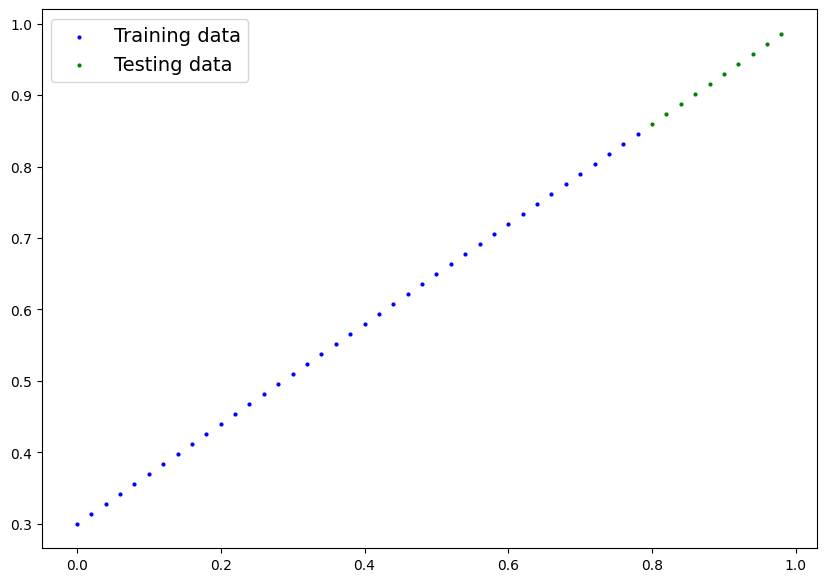

In [84]:
plot_predictions();

## 2. Build model

Our first PyTorch model!

Because we're going to be building classes throughout the course, we need to be familiar with OOP in Python, to do so you can use the following resource from Real Python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [85]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,                   # 1-D weight for linear function
                                           requires_grad=True,  # by default, for use in `torch.autograd` and gradient descent (for many `torch.nn` modules)
                                           dtype=torch.float))  # by default
    self.bias = nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computations in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:   # Required to override the nn.module `forward` method
    return self.weights * x + self.bias  # this is the linear regression formula

  """
  Example using `->` command

  def add(x: int, y: int) -> int:
  return x + y

  """

### PyTorch model building essentials

Getting data ready for large datasets
* `torch.utils.data.Dataset` - Represents a map between key (label) and sample (features) pairs of your data. Such as images and their associated labels
* `torch.utils.data.DataLoader` - Creates a Python iterable over a torch Dataset (allows you to iterate over your data)
* `torchvision.transforms`

Loss function & optimizer
* `torch.nn` - contains all of the buildings for computational graphs (another word for NN)
* `torch.nn.Module` - The base class for all NN modules, if you subclass it, you should overwrite forward()
* `torchvision.models` - Pretrained CV models
* `torch.optim` - this is where the optimziers in PyTorch live, they will help with gradient descent

Evaluating model & improve through experimentation
* `torchmetrics`
* `torch.utils.tensorboard`

Others
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

PyTorch cheat sheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

We can check our model parameters or what's inside our model using `.parameters()`

In [86]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (subclass of nn.module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())   # Outputs weight and bias 1-D parameters

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [87]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method

In [88]:
# Make predictions with model
y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [89]:
# Make predictions with model (This method trains faster as grad info. is removed)
with torch.inference_mode():  # older method: `with torch.no_grad()`
  y_preds = model_0(X_test)

y_preds, y_test

(tensor([[1.6208],
         [1.6385],
         [1.6561],
         [1.6738],
         [1.6914],
         [1.7090],
         [1.7267],
         [1.7443],
         [1.7620],
         [1.7796]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

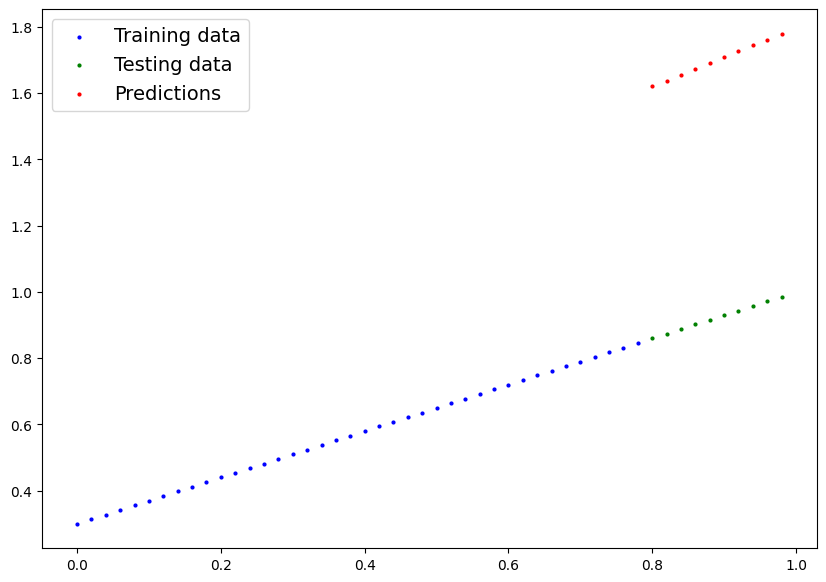

In [90]:
plot_predictions(predictions = y_preds)

## 3. Train model (with loss function and optimization)

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal output; lower is better. https://pytorch.org/docs/stable/nn.html#loss-functions

* **Optimizer:** Adjusts weight and bias parameters to improve the loss function. https://pytorch.org/docs/stable/optim.html

For PyTorch, we need:
* A training loop
* A testing loop

In [91]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [92]:
# Setup a loss function
loss_fn = torch.nn.L1Loss()   # manual method: `torch.mean(torch.abs(y_pred-y_test))`

# Setup an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)  # learning rate = possibly the most important hyperparameter


### Building a training loop (and a testing loop) in PyTorch

Things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through `forward()` method) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of the model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimzier to adjust our model's parameters to improve the loss (**gradient descent**)

In [93]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [94]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values (to compare with future models with different settings)
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # sets all parameters to require_grad = True

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()  # clear the gradients for each new epoch

  # 4. Perform backpropagation on the loss w.r.t the parameters of the model for every parameter with requires_grad = True
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()   # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():   # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad():  # you may also see this in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening in last epoch
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Training Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Training Loss: 0.6860889196395874 | Test loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Training Loss: 0.5708791017532349 | Test loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Training Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Training Loss: 0.34045934677124023 | Test loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Training Loss: 0.2252494841814041 | Test loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Training Loss: 0.1100396141409874 | Test loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Training Loss: 0.009724985808134079 | Test loss: 0.020998019725084305
OrderedDi

In [95]:
import numpy as np
torch.tensor(loss_values).numpy(), test_loss_values  # must convert into numpy before using matplotlib

(array([0.6860889 , 0.5708791 , 0.45566922, 0.34045935, 0.22524948,
        0.11003961, 0.00972499, 0.00621675, 0.00278832, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595],
       dtype=float32),
 [tensor(0.7638),
  tensor(0.6290),
  tensor(0.4943),
  tensor(0.3596),
  tensor(0.2249),
  tensor(0.0902),
  tensor(0.0210),
  tensor(0.0141),
  tensor(0.0058),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075)])

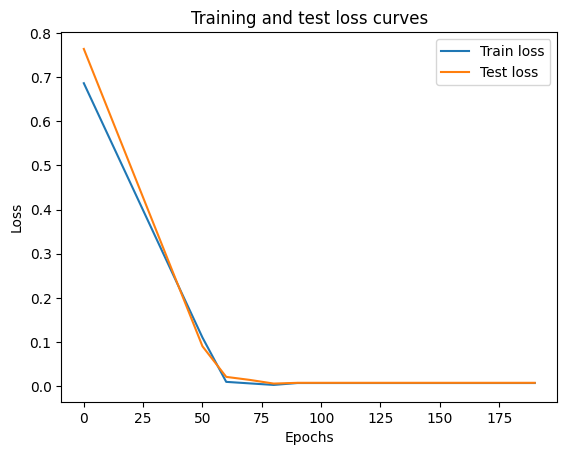

In [96]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [97]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [98]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [100]:
# Saving PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"  # or `.pt`
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)
print(f"Saving model_0 to {MODEL_SAVE_PATH}")

Saving model_0 to model/01_pytorch_workflow_model_0.pth


In [101]:
!ls -l model

total 4
-rw-r--r-- 1 root root 1680 May 27 07:46 01_pytorch_workflow_model_0.pth


## Loading the model

Since we've saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [102]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))  # Only load the state_Dict()

<All keys matched successfully>

In [103]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [104]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

## 6. Putting it all together

Let's go through everything again

In [105]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

Create device-agnostic code.

This means if we've got access to GPU, our code will use it, else it uses CPU


In [106]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [107]:
!nvidia-smi

Mon May 27 07:46:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              33W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [108]:
weight = 0.7
bias = 0.3

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_train)

(40, 40, 10, 40)

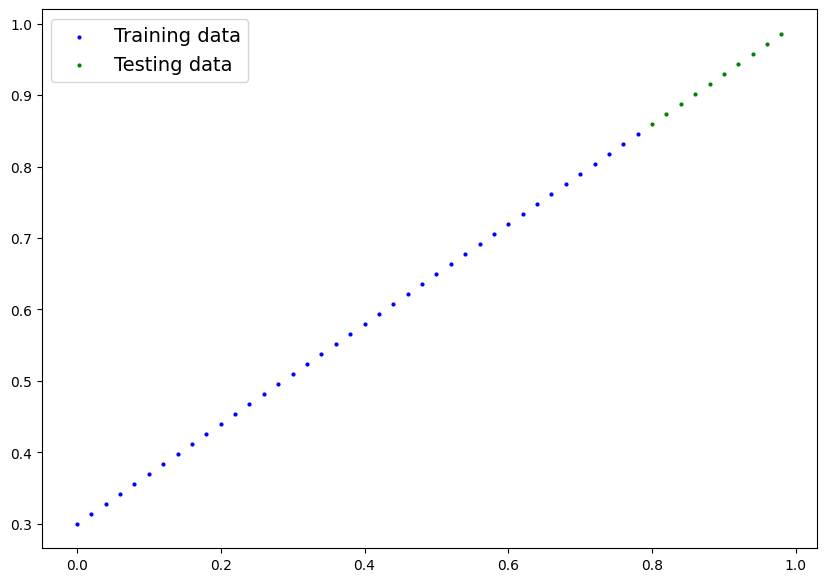

In [109]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building a PyTorch linear model

In [110]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, FC layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,    # Applies the linear regression formula (including `forward()`)
                                  out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:   # Override forward method
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [111]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [112]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For training we need:
* Loss function
* Optimizer
* Training loop
* testing loop

In [113]:
# Setup loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [114]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data) - we must do this so the data is on same device as the model
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)   # X_train was in CPU, while the model is in GPU (will cause error!)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()   # try running without this (loss gets bigger)

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [115]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Making and evaluating predictions

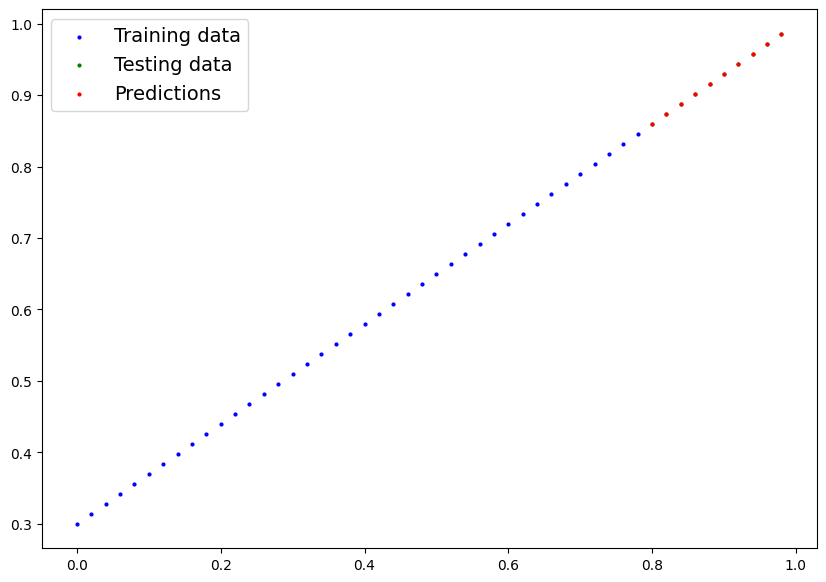

In [119]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions = y_preds.cpu())

# Saving and loading model

In [125]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict()
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [138]:
# Load a PyTorch model

# Create an instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [139]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [140]:
loaded_model_1.state_dict()   # Can proceed to evaluate the model on X_test

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])